In [ ]:
#import all the needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       
from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#read in the train data set
data_train =pd.read_csv('train.csv')

In [20]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

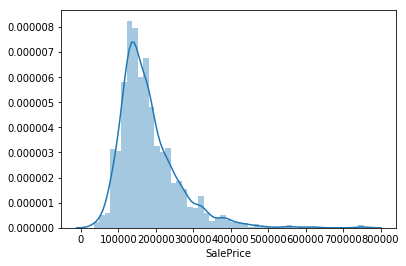

In [115]:
sns.distplot(data_train['SalePrice'])

In [7]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [118]:
#find the 10 variables that are most correlated to the sales price
corrmat = data_train.corr()['SalePrice']
corrmat.nlargest(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [9]:
#the 10 variables
cols=['OverallQual','GrLivArea','GarageCars',
      'GarageArea','TotalBsmtSF','1stFlrSF',
      'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

In [10]:
#import the sklearn package to do regression
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [11]:
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))

In [12]:
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [13]:
#select the selection method with the lowest standard deviation
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-15.384034099478088
RandomForestRegressor cost:-2.429224378675895
BayesianRidge cost:-16.811014753576302


In [124]:
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#random forest regression is chosen to be used
clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[142569.75       314658.9475     117884.375      164543.635
 302504.9925      78307.5        202480.09083333 152781.5125
  78363.75       119897.95       160912.685      114625.5
 102563.125      220662.605      186963.         125000.9375
 194606.7775     134833.6875     117566.875      196302.45
 184894.4925     234669.975      171549.4065     128622.4875
 188956.275      166613.9625     179838.06        97327.75
 192190.         199314.605      123248.76       238437.2575
 188571.5525     112203.875      258526.9725     143433.25
 159283.05       204538.4125     304748.8175     107592.5
 129876.01333333 234754.465      118410.75       382522.38
 136438.4        149638.78       118921.5        119795.775
 436259.395      142217.42       115476.5625     182569.5375
 122528.6825     327848.075      144069.37043651 244158.055
 192262.1875     152880.75       153413.625      116619.625
  81240.5        147266.4475     314437.745      291911.5625
 280922.835      229905.9575     111059.25

In [123]:
print(y_test)

[154500 325000 115000 159000 315500  75500 311500 146000  84500 135500
 145000 130000  81000 214000 181000 134500 183500 135000 118400 226000
 155000 210000 173500 129000 192000 153900 181134 141000 181000 208900
 127000 284000 200500 135750 255000 140000 138000 219500 310000  97000
 114500 205000 119500 253293 128500 117500 115000 127000 451950 144000
 119000 196000 115000 287000 144500 260000 213000 175000 107000 107500
  68500 154000 317000 264132 283463 243000 109000 305000  93500 176000
 118858 134000 109008  93500 611657 173000 348000 341000 141000 124900
 118000  67000 113000  91300 149500 133000 266000 190000 155900 155835
 153500 152000 124500 301000 136500 169990 205000 183900 204900 260000
 163500 224900 244000 132000 194000 156500 156000 275000 145000 135000
  60000 124000 127000 137500 213500 119000 107900 123000 112000 284000
 133000 149000 169000 207000 175000 137000 236000  79500 144000 162900
 185900 369900 197900 104000  35311 337500 367294 130250 230000 755000
 40300

In [16]:
sum(abs(y_pred - y_test))/len(y_pred)

19178.796299257378

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# rename the model
rfr = clf

In [18]:
data_test=pd.read_csv("test.csv")


In [105]:
#extract the same 10 variables from the test data set
#3 of them have missing values
#remove them from cols
cols2=['OverallQual','GrLivArea','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [24]:
#find the mean value of the variables with missing values
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [25]:
data_test['GarageArea'].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [26]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [27]:
#replace the missing value with the mean value
cars=data_test['GarageCars'].fillna(1.766118)

In [28]:
area=data_test['GarageArea'].fillna(472.768861)

In [29]:
bsmt=data_test['TotalBsmtSF'].fillna(1046.117970)

In [30]:
#concatenate these new variables back to col2
data_test_x=pd.concat([data_test[cols2],cars,area,bsmt],axis=1)

In [31]:
#we can see none of the variables have missing values
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
dtype: int64

In [32]:
x = data_test_x.values
#do the prediction
y_te_pred = rfr.predict(x)
print(y_te_pred)

[ 99059.76   116238.405  128208.5125 ... 103017.18   100223.01
 194149.185 ]


In [33]:
print(y_te_pred.shape)
print(x.shape)

(1459,)
(1459, 10)


In [34]:
data_test_x

,OverallQual,GrLivArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageCars,GarageArea,TotalBsmtSF
0,5,896,896,1,5,1961,1961,1.0,730.0,882.0
1,6,1329,1329,1,6,1958,1958,1.0,312.0,1329.0
2,5,1629,928,2,6,1997,1998,2.0,482.0,928.0
3,6,1604,926,2,7,1998,1998,2.0,470.0,926.0
4,8,1280,1280,2,5,1992,1992,2.0,506.0,1280.0
5,6,1655,763,2,7,1993,1994,2.0,440.0,763.0
6,6,1187,1187,2,6,1992,2007,2.0,420.0,1168.0
7,6,1465,789,2,7,1998,1998,2.0,393.0,789.0
8,7,1341,1341,1,5,1990,1990,2.0,506.0,1300.0
9,4,882,882,1,4,1970,1970,2.0,525.0,882.0


In [111]:
prediction=pd.DataFrame(y_te_pred,columns=['SalePrice'])
result=pd.concat([data_test['Id'],prediction],axis=1)
result.index=result.index+1
result

,Id,SalePrice
1,1461,99059.7600
2,1462,116238.4050
3,1463,128208.5125
4,1464,160639.1200
5,1465,254553.4225
6,1466,161785.1350
7,1467,111600.7600
8,1468,150236.9050
9,1469,152834.7400
10,1470,81366.0000


In [114]:
#save the result
result.to_csv('./result.csv',index=False)